In [1]:
from math import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
def sqrt_newton(a_estimating, num_of_iterations=10, tolerance=1e-5):
    """Square root of the newton method calculation"""
    x_k = 10.
    for k in range(num_of_iterations):
        x_k_plus_1 = 1 / 2 * (x_k + a_estimating / x_k)
        if abs(x_k_plus_1 - x_k) <= tolerance:
            break
        x_k = x_k_plus_1
    return x_k


def div_newton(a_estimating, num_of_iterations=10, tolerance=1e-5, initial_estimate=.5):
    """Division Newton method calculation"""
    x_k = initial_estimate
    for k in range(num_of_iterations):
        x_k_plus_1 = x_k * (2 - a_estimating * x_k)
        if abs(x_k - x_k_plus_1) <= tolerance:
            break
        x_k = x_k_plus_1
    return x_k


In [3]:
# Testing the Newton method on numbers 1 to 10
for a in range(1, 11):
    print('Newton Method Sqrt Calculation:', sqrt_newton(a, tolerance=0), 'Actual Sqrt:', sqrt(a))
    print('Newton Method Division Calculation:', div_newton(a, tolerance=0, initial_estimate=1 / a), 'Actual Div:',
          1 / a)
    print()


Newton Method Sqrt Calculation: 1.0 Actual Sqrt: 1.0
Newton Method Division Calculation: 1.0 Actual Div: 1.0

Newton Method Sqrt Calculation: 1.414213562373095 Actual Sqrt: 1.4142135623730951
Newton Method Division Calculation: 0.5 Actual Div: 0.5

Newton Method Sqrt Calculation: 1.7320508075688772 Actual Sqrt: 1.7320508075688772
Newton Method Division Calculation: 0.3333333333333333 Actual Div: 0.3333333333333333

Newton Method Sqrt Calculation: 2.0 Actual Sqrt: 2.0
Newton Method Division Calculation: 0.25 Actual Div: 0.25

Newton Method Sqrt Calculation: 2.23606797749979 Actual Sqrt: 2.23606797749979
Newton Method Division Calculation: 0.2 Actual Div: 0.2

Newton Method Sqrt Calculation: 2.449489742783178 Actual Sqrt: 2.449489742783178
Newton Method Division Calculation: 0.16666666666666666 Actual Div: 0.16666666666666666

Newton Method Sqrt Calculation: 2.6457513110645907 Actual Sqrt: 2.6457513110645907
Newton Method Division Calculation: 0.14285714285714285 Actual Div: 0.1428571428

In [4]:
# The Roots are: 1, 5, 10
# The polynomial is cubic
def polynomial_estimated(x): return x ** 3 - 16 * x ** 2 + 65 * x - 50


def polynomial_newton(num_of_iterations=10, tolerance=1e-5, initial_estimate=.5):
    """Root of a polynomial Numerical Estimation"""
    points_visited = []
    x_k = initial_estimate
    for k in range(num_of_iterations):
        x_k_plus_1 = x_k - (x_k ** 3 - 16 * x_k ** 2 + 65 * x_k - 50) / (3 * x_k ** 2 - 32 * x_k + 65)
        if abs(x_k - x_k_plus_1) <= tolerance:
            break
        points_visited.append(x_k)
        x_k = x_k_plus_1
    return x_k, np.array(points_visited)

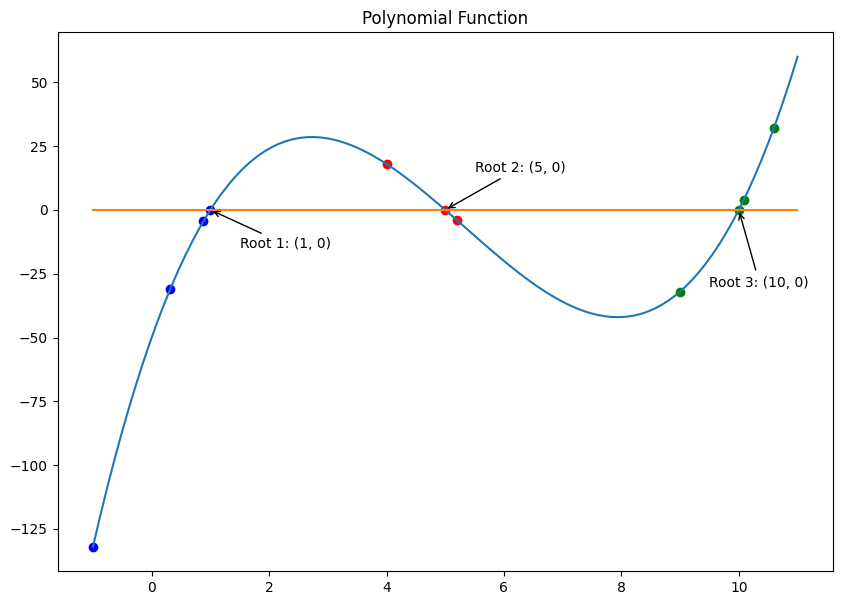

In [5]:
# Visualization of the Newton Method
plt.figure(figsize=(10, 7))
x = np.linspace(-1, 11, 100)
y_function = polynomial_estimated(x)

y_x_axis = [0] * len(x)

points_vis_1 = polynomial_newton(initial_estimate=4)[1]
points_vis_2 = polynomial_newton(initial_estimate=9)[1]
points_vis_3 = polynomial_newton(initial_estimate=-1)[1]

plt.plot(x, y_function)
plt.plot(x, y_x_axis)
plt.scatter(points_vis_1, polynomial_estimated(points_vis_1), marker='o', color='r')
plt.scatter(points_vis_2, polynomial_estimated(points_vis_2), marker='o', color='g')
plt.scatter(points_vis_3, polynomial_estimated(points_vis_3), marker='o', color='b')

plt.annotate(f'Root 1: ({1}, {0})', xy=(1, 0), xytext=(1 + .5, 0 - 15),
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=10)

plt.annotate(f'Root 2: ({5}, {0})', xy=(5, 0), xytext=(5 + .5, 0 + 15),
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=10)

plt.annotate(f'Root 3: ({10}, {0})', xy=(10, 0), xytext=(10 - .5, 0 - 30),
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=10)

plt.title('Polynomial Function')

plt.show()

In [6]:
def harder_newton(num_of_iterations=100, tolerance=1e-5, initial_estimate=np.array([1., 1.])):
    """Newton method for a harder set of equations that have to be satisfied"""
    x_k = initial_estimate.reshape(-1, 1)
    for k in range(num_of_iterations):
        x_k_plus_1 = (x_k -
                      np.linalg.inv(np.array([
                          [2 * (x_k[0][0] - 1), 2 * x_k[1][0]],
                          [4 * x_k[0][0] ** 3, 4 * x_k[1][0] ** 3]
                      ])) @
                      np.array([
                          [(x_k[0][0] - 1) ** 2 + x_k[1][0] ** 2 - 1],
                          [x_k[0][0] ** 4 + x_k[1][0] ** 4 - 1]
                      ]))
        if np.linalg.norm(x_k - x_k_plus_1) <= tolerance:
            break
        x_k = x_k_plus_1
    return x_k


harder_newton()

array([[0.67185976],
       [0.94462903]])

Optimal x: -0.0


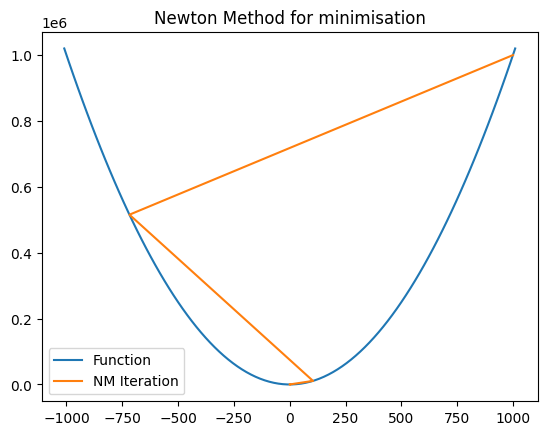

In [7]:
# Find Local Minimum using the newton method
def newton_method(func, num_of_iterations=100, tolerance=1e-5, initial_estimate=10):
    """
    Newton method to find extreme of a function.
    The f'(x) and f''(x) are computed numerically.
    :param func: function which extreme has to be found
    :param num_of_iterations: maximal number of iterations
    :param tolerance: when the change between iterations is smaller than tolerance algo returns result
    :param initial_estimate: the initial estimate from which the NM starts the iteration
    :return: the result of the NM method, the points visited by the NM algo
    """

    def function_der(x_var, h=1e-5):
        return (func(x_var + h) - func(x_var)) / h

    def function_der_2(x_var, h=1e-5):
        return (func(x_var + h) - 2 * func(x_var) + func(x_var - h)) / h ** 2

    pts_visited = []
    x_k = initial_estimate
    for k in range(num_of_iterations):
        x_k_plus_1 = x_k - function_der(x_k) / function_der_2(x_k)
        pts_visited.append(x_k)
        if abs(x_k - x_k_plus_1) <= tolerance:
            break
        x_k = x_k_plus_1
    return x_k, np.array(pts_visited)


def function(x): return x ** 2 - 2


x, points_visited = newton_method(function, initial_estimate=1000)
print('Optimal x:', format(x, '.1f'))

x = np.linspace(-1010, 1010, 100)
plt.plot(x, function(x))

plt.plot(points_visited, function(points_visited))
plt.title('Newton Method for minimisation')
plt.legend(['Function', 'NM Iteration'])
plt.show()

x0: 5.0
x1: 10.0


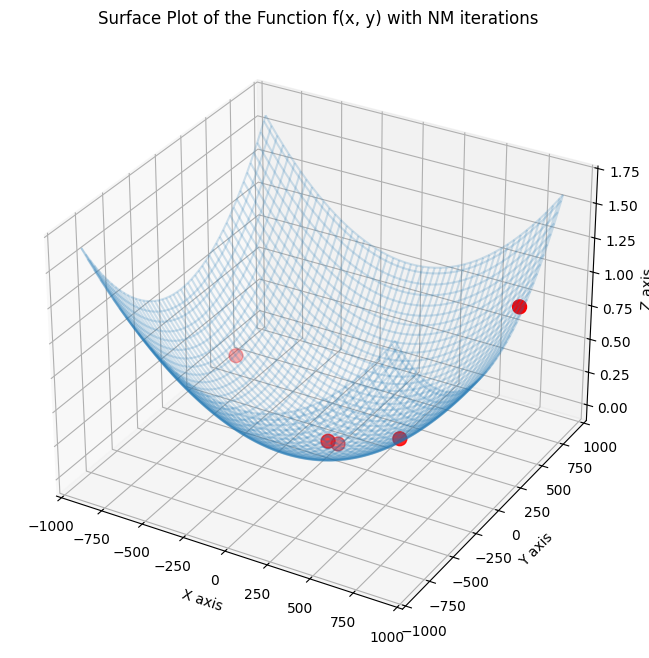

In [8]:
# Find local minimum using newton method for functions of two variables
def newton_method_2(func, num_of_iterations=100, tolerance=1e-5, initial_estimate=np.array([856, 523])):
    """
    Newton method to find extreme of a function.
    The f'(x) and f''(x) are computed numerically.
    :param func: function which extreme has to be found
    :param num_of_iterations: maximal number of iterations
    :param tolerance: when the change between iterations is smaller than tolerance algo returns result
    :param initial_estimate: the initial estimate from which the NM starts the iteration
    :return: the result of the NM method, the points visited by the NM algo
    """

    def function_der(x_var, y_var, h=1e-5):
        return np.array(
            [(func(x_var + h, y_var) - func(x_var, y_var)) / h, (func(x_var, y_var + h) - func(x_var, y_var)) / h])

    def function_der_2(x_var, y_var, h=1e-5):
        return np.array([(func(x_var + h, y_var) - 2 * func(x_var, y_var) + func(x_var - h, y_var)) / h ** 2,
                         (func(x_var, y_var + h) - 2 * func(x_var, y_var) + func(x_var, y_var - h)) / h ** 2])

    pts_visited = []
    x_k = initial_estimate
    for k in range(num_of_iterations):
        x_k_plus_1 = x_k - function_der(x_k[0], x_k[1]) / function_der_2(x_k[0], x_k[1])
        pts_visited.append(x_k)
        if np.linalg.norm(x_k - x_k_plus_1) <= tolerance:
            break
        x_k = x_k_plus_1
    return x_k, np.array(pts_visited)


def f(x, y): return (x - 5) ** 2 + (y - 10) ** 2


result, points_visited = newton_method_2(f)
for i in range(len(result)):
    print('x' + str(i) + ':', format(result[i], '.1f'))

x = np.linspace(-900, 900, 100)
y = np.linspace(-900, 900, 100)
X, Y = np.meshgrid(x, y)

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_wireframe(X, Y, f(X, Y), alpha=.2)
ax.scatter(points_visited[:, 0], points_visited[:, 1], f(points_visited[:, 0], points_visited[:, 1]), s=100, c='r')

# Set labels
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

# Set title
plt.title('Surface Plot of the Function f(x, y) with NM iterations')

# Show the plot
plt.show()

In [9]:
def f(c: complex) -> complex:
    """
    Complex function
    Root1: 2 + 3j Root2: -3 - 4j Root3: 5 + 2j
    """
    r1 = 2 + 3j
    r2 = -3 - 4j
    r3 = 5 + 2j
    return (c - r1) * (c - r2) * (c - r3)


def f_der(c: complex) -> complex:
    """Complex function derivative"""
    r1 = 2 + 3j
    r2 = -3 - 4j
    r3 = 5 + 2j
    # Product rule application
    return (c - r2) * (c - r3) + (c - r1) * (c - r3) + (c - r1) * (c - r2)

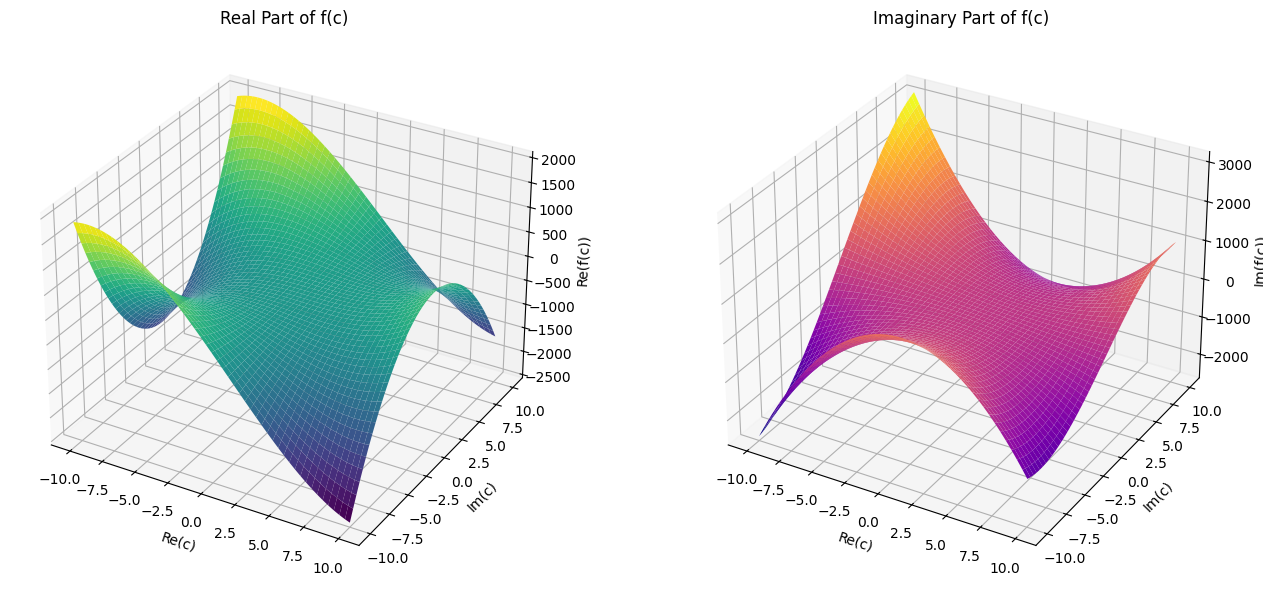

In [10]:
# Visualize the Complex function
# Generate a grid of complex numbers
x = np.linspace(-10, 10, 400)
y = np.linspace(-10, 10, 400)
X, Y = np.meshgrid(x, y)
C = X + 1j * Y  # Create a grid of complex numbers

# Evaluate the function on the grid
Z = f(C)

# Separate the real and imaginary parts
Z_real = np.real(Z)
Z_imag = np.imag(Z)

# Create a figure and 3D axes
fig = plt.figure(figsize=(14, 6))

# Plotting the real part in 3D
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X, Y, Z_real, cmap='viridis', edgecolor='none')
ax1.set_title('Real Part of f(c)')
ax1.set_xlabel('Re(c)')
ax1.set_ylabel('Im(c)')
ax1.set_zlabel('Re(f(c))')

# Plotting the imaginary part in 3D
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(X, Y, Z_imag, cmap='plasma', edgecolor='none')
ax2.set_title('Imaginary Part of f(c)')
ax2.set_xlabel('Re(c)')
ax2.set_ylabel('Im(c)')
ax2.set_zlabel('Im(f(c))')

plt.tight_layout()
plt.show()

In [11]:
def newton_c(num_of_iterations=1000, tolerance=1e-5, initial_estimate=2 + 1j):
    """Newton Method for complex function f"""
    visited_points = []
    x_k = initial_estimate
    for k in range(num_of_iterations):
        x_k_plus_1 = x_k - f(x_k) / f_der(x_k)
        visited_points.append(x_k)
        if abs(x_k - x_k_plus_1) <= tolerance:
            break
        x_k = x_k_plus_1
    return x_k, visited_points


result, visited_points = newton_c(initial_estimate=15 + 2j)
_, visited_points_2 = newton_c(initial_estimate=20 + 20j)
_, visited_points_3 = newton_c(initial_estimate=-20 + 15j)
print('The Root calculated by the Newton Method', result, 'The Sanity Check', f(result), 'should equal 0')

The Root calculated by the Newton Method (5.000000012050097+1.9999999797722494j) The Sanity Check (5.637804129989897e-07-4.863315550482864e-07j) should equal 0


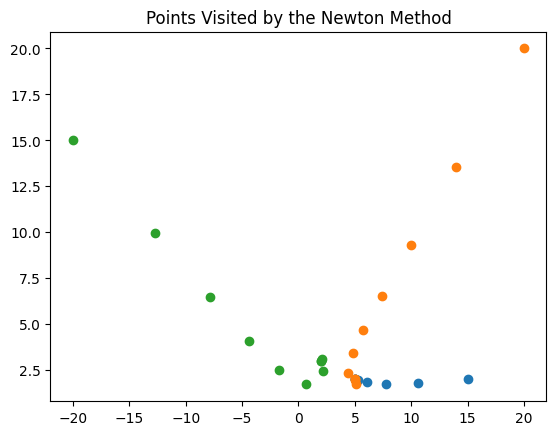

In [12]:
# Visualize the algo of root finding by the newton method
x = np.linspace(-10, 10, 400)
y = np.linspace(-10, 10, 400)
X, Y = np.meshgrid(x, y)
C = X + 1j * Y  # Create a grid of complex numbers

real, imaginary = np.real(visited_points), np.imag(visited_points)
plt.scatter(real, imaginary)
real, imaginary = np.real(visited_points_2), np.imag(visited_points_2)
plt.scatter(real, imaginary)
real, imaginary = np.real(visited_points_3), np.imag(visited_points_3)
plt.scatter(real, imaginary)

plt.title('Points Visited by the Newton Method')
plt.show()

In [13]:
def nearest_to_root(c, roots=(2 + 3j, -3 - 4j, 5 + 2j)):
    biggest_dif = float('inf')
    nearest_root = None
    for root in roots:
        if abs(c - root) < biggest_dif:
            biggest_dif = abs(c - root)
            nearest_root = root
    return nearest_root


# Recreate the Complex list object
x = np.linspace(-10, 10, 5000)
y = np.linspace(-10, 10, 5000)
X, Y = np.meshgrid(x, y)
C = X + 1j * Y  # Create a grid of complex numbers

roots_and_points = [[] for _ in range(len(C))]
counter = 0
for row in range(len(C)):
    for n in C[row]:
        counter += 1
        if counter % 85 == 0 or True:
            nearest_to = nearest_to_root(newton_c(initial_estimate=n)[0])
            if nearest_to == 2 + 3j:
                color = 0
            elif nearest_to == -3 - 4j:
                color = 1
            elif nearest_to == 5 + 2j:
                color = 2
            roots_and_points[row].append(color)

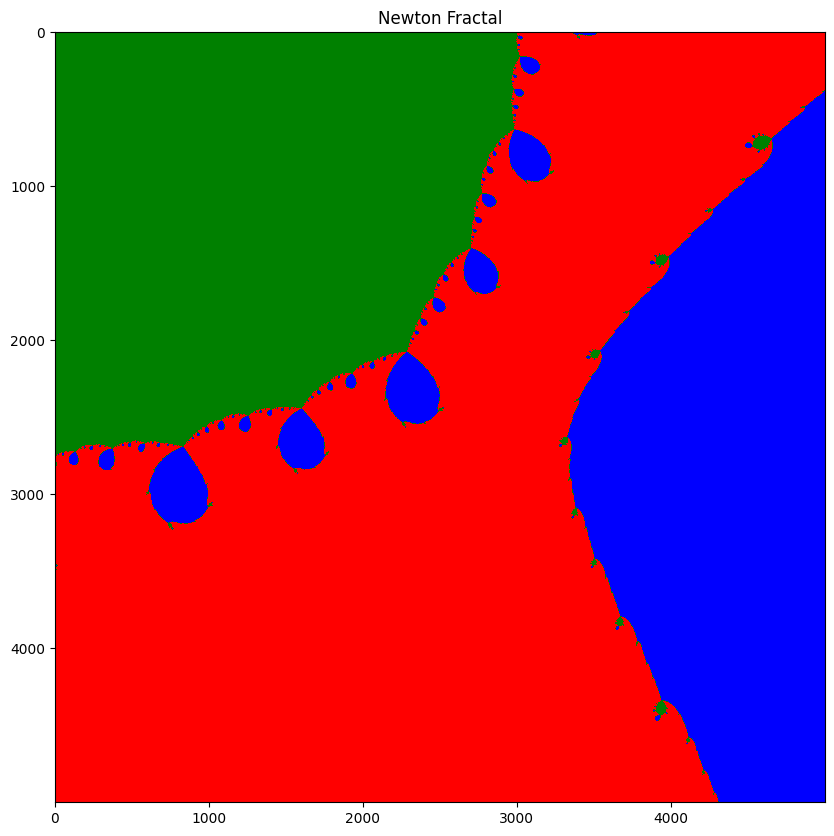

In [14]:
plt.figure(figsize=(15, 10))

# Hexadecimal colors
colors = ['red', 'green', 'blue']

my_cmap = ListedColormap(colors)

plt.imshow(roots_and_points, cmap=my_cmap)

plt.title('Newton Fractal')
plt.show()